<a href="https://colab.research.google.com/github/Dantelarroy/suplements-chatbot/blob/main/Supplements_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Supplements Chatbot**


**Autor**: Dante Larroy  
**Fecha**: 18/12/2024  
**Fecha de Entrega**: 02/01/2025  

Resumen de Fechas:
- EDA y Preprocesamiento de Datos: `18/12 - 21/12`
- Desarrollo del Modelo de Sentimiento: `22/12 - 24/12`
- Desarrollo del Modelo de Clasificación de Tópicos: `26/12 - 28/12`
- Desarrollo de la Función IA Generativa: `29/12 - 31/12`
- Pruebas, Evaluación y Ajustes: `01/01 - 02/01`
- Entrega Final: `2/01/2025`

---

## **Introducción**  
El objetivo de este desafío es aplicar tus conocimientos en DS e IA
Generativa para diseñar un prototipo funcional, que eventualmente se convierta
en un chatbot capaz de ofrecer soporte a usuarios en base a sus comentarios.
---
## **Contexto**
El cliente es una destacada empresa de venta de suplementos nutricionales en
línea.

- **Problema:** Recientemente, se ha observado un aumento significativo en las reseñas
negativas por parte de los usuarios, algo que anteriormente no sucedía.
Ante esta situación, la empresa busca comprender las causas detrás de esta tendencia.

- **Solución buscada:** Analizar los datos disponibles y desarrollar herramientas útiles para abordar el problema.
---
## **Objetivo**
Este proyecto tiene como objetivo desarrollar una herramienta que:
1. Analice el sentimiento y clasifique los comentarios de los clientes por temática.
2. Genere respuestas personalizadas basadas en el análisis.  
---
## **Dataset:**

- Comentarios de usuarios sobre productos de suplementos nutricionales con etiquetas de sentimientos (positivo, neutral, negativo).
---
## **Etapas del Proyecto**
### EDA
- Cargar Dataset (Asegurar que se cargue independientemente del lugar de ejecución) ☑
- Revisar calidad de los datos ☑
- Analizar distribución de sentimientos ☑
- Word Cloud ☑
- Complementar con un top de palabras ☑
- Longitud de los comentarios ☑

### Preprocesamiento y Limpieza de Datos
- Preprocesar texto:
- Mínusculas ☑
- Eliminar caracteres especiales y puntuación ☑
- Eliminar stopwords ☑
- Lematización ☑
- Tokenización 𐩃
- Gestionar datos desbalanceados si hace falta

### Modelado Predictivo:

  1. Sentimental Analysis:(Tenemos el target = Supervisado)
- Pensar que tipo de modelo necesito
- Pensar que problema podría surgir a la hora de entrenarlo para elegir el algoritmo.

2. Topic Modeling: Predecir el tema del que están hablando (No tenemos el target = No supervisado)
- Pensar que tipo de modelo necesito
- Pensar que problema podría surgir a la hora de entrenarlo para elegir el algoritmo.

3. Evaluar el Modelo

### IA Generativa:

  1. Generar una funcion que tenga:
  - Input: Comentario
  - Tareas:
    - Calcular el sentimiento
    - Calcular el tópico
  - Output: Respuesta personalizada de un LLM utilizando esa función
---
## **Recursos adicionales**
Links que pueden ser de útilidad (y que probablemente influyan en su
entregable):
1. https://huggingface.co/intfloat/multilingual-e5-large - Modelo de
Embedding multilenguaje.
2. https://console.groq.com/playground - Plataforma que permite utilizar
LLMs Open Source de manera gratuita a través de una API.

---

## Research Claves por etapas:

- Etapa 1: Modelado Predictivo:
https://huggingface.co/intfloat/multilingual-e5-large - Modelo de Embedding multilenguaje.
  - **1. Sentimental Analysis (Supervisado)**:
    - `Text Preprocesing`: Tokenization. Stop word removal, lemmatization/stemming
    - `Text Vectorization`: TF-IDF, Word Embeddings
    - `Sentimental Analysis`: Elegir y analizar modelo a utilizar
  - **2. Topic Classification (No supervisado)**
    

- Etapa 2: IA Generativa
  - https://console.groq.com/playground - Plataforma que permite utilizar LLMs Open Source de manera gratuita a través de una API.

---

# Configuración del Entorno de Trabajo

## Instalar librerias necesarias

In [60]:
!pip install openpyxl

## Importaciones

In [61]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer


# Descargar las stopwords de NLTK
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [62]:
#!git clone https://github.com/Dantelarroy/suplements-chatbot.git

## Cargar el Dataset

In [63]:
# URL del repositorio de Github donde se encuentra el Dataset
url = 'https://github.com/Dantelarroy/suplements-chatbot/raw/main/Dataset.xlsx'

In [64]:
df_supplements = pd.read_excel(url)


In [65]:
df_supplements.head()

,Texto,Sentimiento
0,"El sabor es increíble, lo mejor que he probado",positivo
1,Llegó tarde y el paquete estaba dañado,negativo
2,El precio es razonable para la calidad,positivo
3,No noto diferencia con otros productos similares,neutral
4,El envío fue rápido y sin problemas,positivo


# EDA

Research:
- https://medium.com/dscier/eda-nlp-fe483c6871ba
- https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
- https://medium.com/@berthelinmargot/eda-and-data-preparation-for-nlp-project-a-hands-on-example-step-by-step-3b95a37318db
- https://medium.com/@KC-James/basic-implementation-of-a-word-cloud-in-python-8b2f9d92d381
- https://medium.com/dscier/eda-nlp-fe483c6871ba

## Estructura y Estadísticas

Información General

- Contiene dos columnas con Dtype: Object
- No hay nulos
- Cantidad de filas (299)

In [66]:
# Veo la información general de las columnas
df_supplements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Texto        299 non-null    object
 1   Sentimiento  299 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


Nulos

El dataset no presenta valores nulos (lo vi en el código anterior), vuelvo a hacer un check.

In [67]:
# Cuantifico numero total de nulos por columna
df_supplements.isnull().sum()

,0
Texto,0
Sentimiento,0


Describe:
- No hay nulos (299 valores en ambas columnas)
- En la columna Sentimiento encuentro 3 filas repetidas
- El valor más frecuente es:
  - Texto: "Estoy satisfecho con la calidad del producto". Esto podría ser un buen indicio sobre el producto ofrecido.
  - Sentimiento: Positivo. Confirma que el indicio anterior. Frecuencia positiva más recurrente.

In [68]:
# Resumen estadístico de las columnas
df_supplements.describe()


,Texto,Sentimiento
count,299,299
unique,296,3
top,Estoy satisfecho con la calidad del producto,positivo
freq,2,129


In [69]:
# Elimino duplicados

Distribución de sentimientos


Busco identificar si el datset se encuentra o no desbalanceado.

Identifico una distribución algo desbalanceada con una predominancia de "Positivo" sobre el resto de las categorías.

Como aspecto positivo por otro lado veo que "neutral" y "negativo" tienen una distribución similar entre ellos.

Ultimo aspecto es que "neutral" es el que menor frecuencia tiene. Lo veo natural ya que el cliente suele expresarse cuando algo le disgusta o le gusta.

Riesgos:
- Que el modelo entrenado genere "sesgo" hacia lo positivo.
- Es posible que haya que realizar un ajuste en caso de que eso ocurra.

In [70]:
# Distribución de Sentimientos
distribucion_sentimientos = df_supplements['Sentimiento'].value_counts()
print(distribucion_sentimientos)

Sentimiento
positivo    129
negativo     97
neutral      73
Name: count, dtype: int64


<ipython-input-71-5037f801704d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentimiento', data= df_supplements, palette='Set2')


<function matplotlib.pyplot.show(close=None, block=None)>

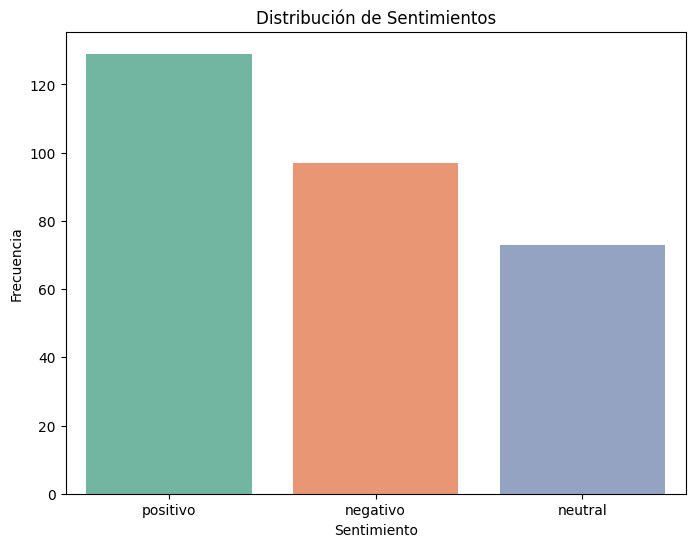

In [71]:
# Grafico la distribución

plt.figure(figsize=(8,6))
sns.countplot(x='Sentimiento', data= df_supplements, palette='Set2')
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show


In [72]:
# Revisión de tipo de datos
df_supplements['Texto'] = df_supplements['Texto'].astype(str)
df_supplements['Sentimiento'] = df_supplements['Sentimiento'].astype(str)

Longitud del "Texto"

Anaalizo la longitud de los comentarios para identificar sobre todo si los comentarios son similares en cuanto a longitud entre los "Positivos" y los "Negativos".

- Detectar patrones en cuánto al detalle de las críticas
- Analizar las criticas cortas o largas en relación al sentimiento de la crítica


count    299.000000
mean       7.053512
std        1.372236
min        3.000000
25%        6.000000
50%        7.000000
75%        8.000000
max       11.000000
Name: longitud_palabras, dtype: float64


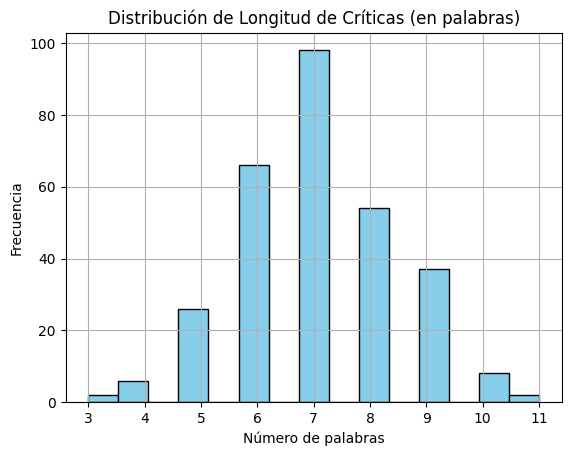

In [73]:
# Función para contar palabras
def contar_palabras(texto):
  return len(texto.split())

# Longitud del texto en palabras
df_supplements["longitud_palabras"] = df_supplements["Texto"].apply(contar_palabras)

# Resumen estadístico
print(df_supplements['longitud_palabras'].describe())

# Gráfico de la distribución de la longitud en palabras
df_supplements['longitud_palabras'].hist(bins=15, color='skyblue', edgecolor='black')
plt.title('Distribución de Longitud de Críticas (en palabras)')
plt.xlabel('Número de palabras')
plt.ylabel('Frecuencia')
plt.show()

Identifico que el promedio de palabras por crítica es de 7 palabras.

Ahora voy a desarrollar esto:
- Gráficar el promedio de palabras por crítica de cada tipo de crítica "Negativa", "Positiva" y "Neutra" para buscar patrones.
Ej. Las críticas positivas son mas breves y las negativas son más cortas.
- Analizar las críticas más cortas y más largas en relación al sentimiento

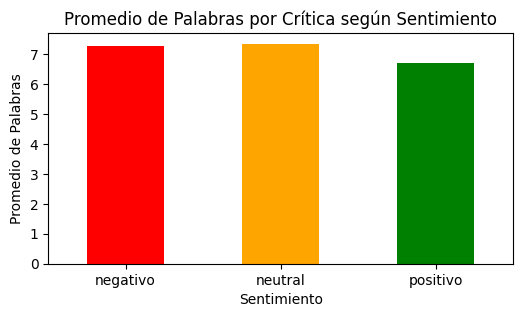

In [93]:
# Graficar el promedio de palabras por sentimiento
promedio_palabras = df_supplements.groupby('Sentimiento')['longitud_palabras'].mean()

# Graficarlo
promedio_palabras.plot(kind='bar', color=['red','orange','green'],figsize=(6,3))
plt.title('Promedio de Palabras por Crítica según Sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Promedio de Palabras')
plt.xticks(rotation=0)
plt.show()


Analizar las críticas más cortas y más largas en relación al sentimiento (Top 10 de cada una)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nsmallest.html


In [94]:
# Críticas más cortas (top 10)
criticas_cortas = df_supplements.nsmallest(10, 'longitud_palabras')
print("Críticas más cortas (top 10):")
print(criticas_cortas[['Texto', 'longitud_palabras', 'Sentimiento']])

Críticas más cortas (top 10):
                                Texto  longitud_palabras Sentimiento
20   excelente relación calidadprecio                  3    positivo
206  excelente relación preciocalidad                  3    positivo
86                    perfecto quejas                  4    positivo
96          producto promedio destaca                  4     neutral
158        producto increíble encanta                  4    positivo
233    excelente atención profesional                  4    positivo
242               perfecto recomiendo                  4    positivo
262       causó molestias estomacales                  4    negativo
24        envío tomó demasiado tiempo                  5    negativo
41         excelente sabor satisfecho                  5    positivo


In [95]:
# Críticas más largas (top 10)
criticas_largas = df_supplements.nlargest(10, 'longitud_palabras')
print("\nCríticas más largas (top 10):")
print(criticas_largas[['Texto', 'longitud_palabras', 'Sentimiento']])


Críticas más largas (top 10):
                                         Texto  longitud_palabras Sentimiento
88                  sabor mal volvería comprar                 11     neutral
263                         sabor esperaba mal                 11     neutral
14                tiempo envío rápido esperado                 10    positivo
21                 textura producto rara gustó                 10    negativo
134                      precio alto vale pena                 10     neutral
180                   paquete llegó golpe bien                 10     neutral
203                         sabor dulce agrado                 10    negativo
205  paquete llegó bien aunque tardó prometido                 10     neutral
217          generó dolor cabeza volveré tomar                 10    negativo
224                   creo precio justo ofrece                 10    positivo


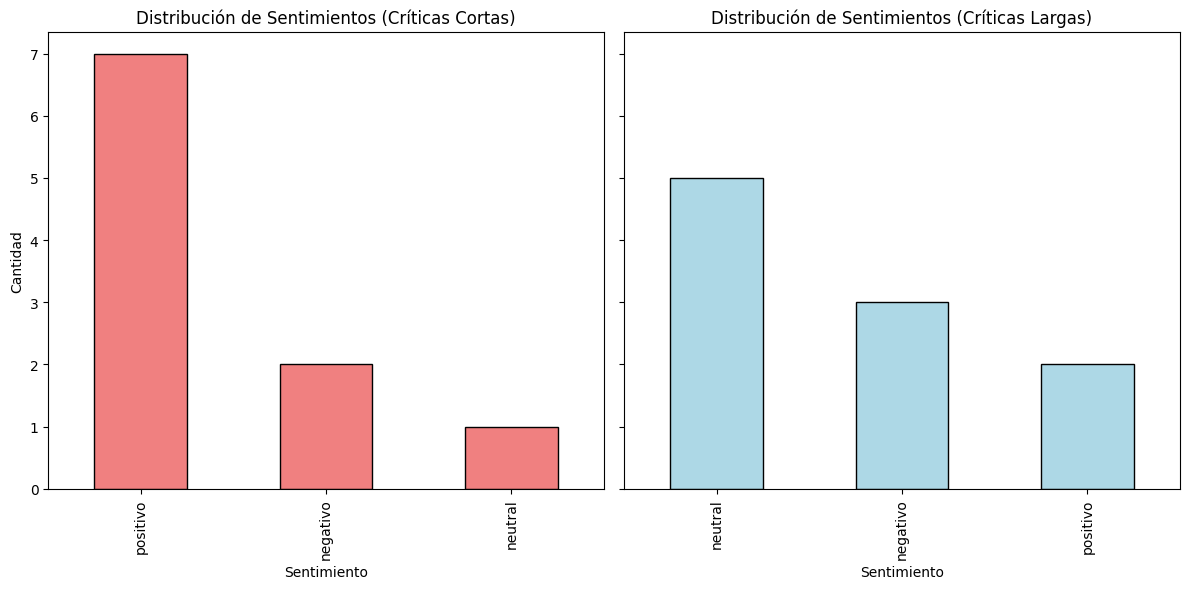

In [96]:
# Creo una figura con dos gráficos uno al lado del otro
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Distribución de sentimientos en críticas cortas
criticas_cortas['Sentimiento'].value_counts().plot(
    kind='bar', color='lightcoral', ax=axs[0], edgecolor='black')

# Etiqueta y titulo del primer gráfico (Criticas cortas)
axs[0].set_title('Distribución de Sentimientos (Críticas Cortas)')
axs[0].set_xlabel('Sentimiento')
axs[0].set_ylabel('Cantidad')

# Distribución de sentimientos en críticas largas
criticas_largas['Sentimiento'].value_counts().plot(
    kind='bar', color='lightblue', ax=axs[1], edgecolor='black')

# Título del segundo gráfico (Criticas largas)
axs[1].set_title('Distribución de Sentimientos (Críticas Largas)')
axs[1].set_xlabel('Sentimiento')

plt.tight_layout()
plt.show()

A simple vista se puede ver como las críticas más cortas tienen una tendencia de ser positivas.
Y las críticas más largas tienen una tendencia de ser neutrales.

---
Limpieza y normalización del texto:

Antes de realizar un analisis más detallado del contenido del Dataset y de entrenar los modelos realizo la normalización.

- Convierto minúsculas
- Elimino puntuaciones y caracteres especiales (dejo las tildes, ñ, números y espacios porque considero que puede ser significativo en español).
- Elimino stopwords que no generan un valor semántico.
- Reduzco las palabras a su base para evitar duplicar términos que tengan un significado similar semanticamente.

In [78]:
# Limpieza y normalización del texto para realizar el Word Cloud

# Inicio el lematizador de NLTK
lemmatizer = WordNetLemmatizer()

def clean(texto):

  # Convertir a mínuscula para asegurarme que se maneje de manera uniforme
  texto = texto.lower()

 # Eliminar puntuaciones y caracteres especiales
 # Conservar letras con acento, ñ y números
 # Se permiten: letras a-z, vocales acentuadas, ñ, números y espacios
  texto =  re.sub('[^a-záéíóúüñ0-9\s]+', '', texto)

  # Eliminar Stopwords que no tienen valor informativo
  texto = " ".join([word for word in texto.split() if word not in stopwords.words('spanish')])

  # Lematización para reducir las variaciones morfólogicas de las palabras
  texto = " ".join([lemmatizer.lemmatize(word) for word in texto.split()])

  return texto

# Aplico la función de limpieza al df

df_supplements['Texto'] = df_supplements['Texto'].apply(clean)


In [79]:
df_supplements.head()

,Texto,Sentimiento,longitud_palabras
0,sabor increíble mejor probado,positivo,9
1,llegó tarde paquete dañado,negativo,7
2,precio razonable calidad,positivo,7
3,noto diferencia productos similares,neutral,7
4,envío rápido problemas,positivo,7


WordCloud

Visualización de las palabras más frecuentes (cualitativamente).
A simple vista son las principales palabras. :
- Sabor
- Producto
- Precio
- Calidad
- Servicio
- llego
- rapido

Entiendo que va de la mano con el desbalance positivo de los comentarios.

A simple vista pareciera que el producto es el principal eje de los comentarios y que el precio, el sabor y la velocidad son las variables más comentadas por los clientes.

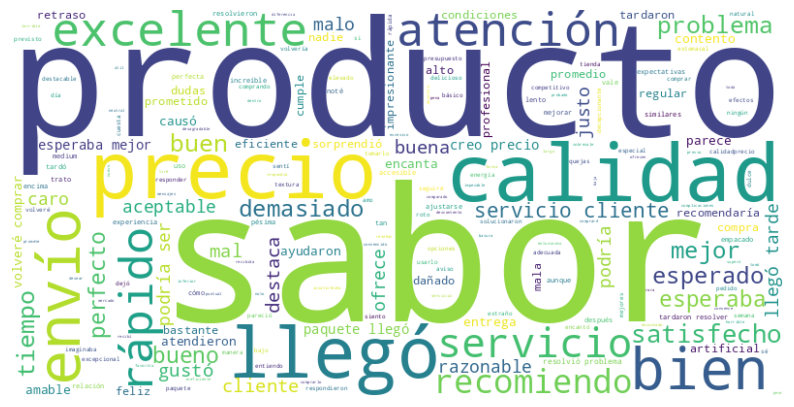

In [80]:
# Wordcloud para visualizar las palabras más frecuentes en los comentarios de los usuarios
texto_completo = " ".join(df_supplements["Texto"])

wordcloud = WordCloud(width=800,height=400,background_color='white').generate(texto_completo)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')  # 'bilinear' para suavizar la imagen
plt.axis('off')  # Quitar los ejes
plt.show()

CounterVectorizer

En este caso quiero ver de manera cuantitativa y más detallada la misma repetición.

Voy a analizar el top 10 de palabras más frecuentas.

De esta manera voy a buscar complementar la Word Cloud con esta herramienta.

Analizando el gráfico refuerzo la idea anterior, eje de los comentarios "Producto" y variables principales "Sabor", "Precio", "Entrega" y "Atención"

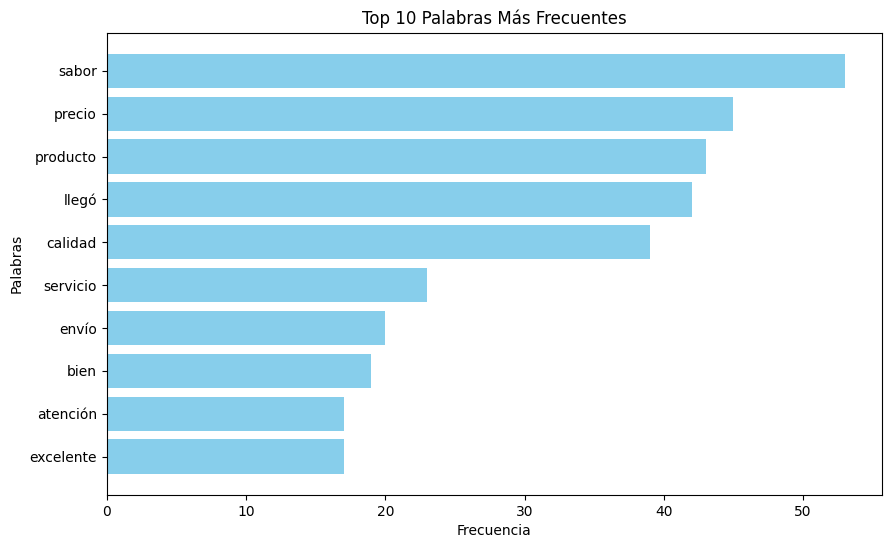

In [81]:
# CountVectorizer para complementar el ánalisis de las palabras más frecuentes

# Inicio el CountVectorizer
vectorizer = CountVectorizer(max_features=10)

# Aplico el vectorizer a la columna "Texto" del df
# X es una matriz dispersa, en el paso siguiente tengo que pasarla a matriz densa para facilitar el trabajo
X = vectorizer.fit_transform(df_supplements['Texto'])

# Obtengo las palabras y sus frecuencias
# Lista de palabras más frecuentes
palabras = vectorizer.get_feature_names_out()
# Convierto X a matriz densa (Facilita el manejo)
frecuencias = X.toarray().sum(axis=0)

# Creo un df para visualizar las palabras más frecuentes
df_palabras = pd.DataFrame({'Palabra': palabras, 'Frecuencia': frecuencias})

# Ordeno el df por frecuencia en orden descendente
df_palabras = df_palabras.sort_values(by='Frecuencia', ascending=False)

# Genero la visualización de las top 10 palabras más frecuentes
plt.figure(figsize=(10, 6))
plt.barh(df_palabras['Palabra'], df_palabras['Frecuencia'], color='skyblue')
plt.title('Top 10 Palabras Más Frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.gca().invert_yaxis()  # Para que la palabra más frecuente esté arriba
plt.show()


# Preprocesamiento de Datos

In [85]:
# Ajuste de clases (Desbalanceado)

In [86]:
# Tokenización

In [87]:
# Eliminar Stopwords

In [88]:
# Lematización

In [89]:
# Vectorización

In [90]:
# Codificacion de Sentimientos

In [91]:
# División de Dataset

# ETAPA 1: Modelado Predictivo

Realizar research de los siguientes términos:


## Predicción de Sentimiento

## Modelado de Topico

## Predicción de Tópico

Research:
- https://medium.com/@daffabercerita/how-to-use-large-language-model-for-topic-modeling-a-comprehensive-guide-6c03d365cc90
-

# ETAPA 2: IA GENERATIVA